# Testing deep convolutional neural networks on tensorflow

In [2]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
%matplotlib inline

## CIFAR-10

In [3]:
train_data = CIFAR10DataProvider('train', batch_size=50)
valid_data = CIFAR10DataProvider('valid', batch_size=50)

### Image example

(1, 3, 32, 32)
(1, 32, 32, 3)


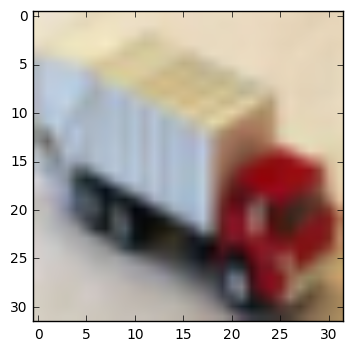

In [4]:
#img = np.reshape(train_data.inputs[0],[32,32,3])
img = np.reshape(train_data.inputs[5],(1,3,32,32))
print(img.shape)
img = np.transpose(img,[0,2,3,1])
print(img.shape)
plt.imshow(img[0])
plt.show()

In [7]:
print(train_data.inputs[0].size)

3072


In [4]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

def fully_connected_layer2(inputs, input_dim, output_dim, nonlinearity=tf.nn.sigmoid):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [8]:
def convolutional_layer(inputs, input_dim, output_dim,img_dim, img_channels,conv_channels, keep_prob,nonlinearity=tf.nn.conv2d):
    
    weights = tf.Variable(
        tf.truncated_normal(
            [3,3,img_channels,32], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([32]), 'biases')
    #x_image = tf.reshape(inputs, [-1,img_dim,img_dim,img_channels]) #[batch, in_height, in_width, in_channels]
    x_image = tf.reshape(inputs,[-1,3,32,32])
    #print(img.shape)
    x_image = tf.transpose(x_image,[0,2,3,1])
    #x_image =tf.reshape(inputs, [-1,img_dim,img_dim,img_channels]) #[batch, in_height, in_width, in_channels]
    h_conv1 = tf.nn.relu(conv2d(x_image, weights) + biases)
    #h_conv1 = tf.contrib.layers.batch_norm(h_conv1) #batch normalization
    #h_conv1 = tf.cond(keep_prob < 0.9, lambda: tf.contrib.layers.batch_norm(h_conv1), lambda:h_conv1)
    h_pool1 = avg_pool_2x2(h_conv1)
    #W_conv2 = weight_variable([3,3,64,64])
    #_conv2 =bias_variable([64])
    #h_conv2 = tf.nn.relu(conv2d(h_pool1,weights2)+biases2)
    #h_pool2 = max_pool_2x2(h_conv2) #out 8*8x64
    #outputs = tf.nn.dropout(nonlinearity(tf.matmul(inputs, weights) + biases), keep_prob)
    #return tf.nn.dropout(tf.reshape(h_pool2,[-1,1*int((img_dim*0.25)*(img_dim*0.25))*32]),keep_prob)
    return tf.reshape(h_pool1,[-1,1*int((img_dim*0.5)*(img_dim*0.5))*32])

In [103]:
def convolutional_layer_2(inputs, input_dim, output_dim,img_dim, img_channels,conv_channels, keep_prob,nonlinearity=tf.nn.conv2d):
    
    weights = tf.Variable(
        tf.truncated_normal(
            [3,3,img_channels,32], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([32]), 'biases')
    
    
    
    weights2 = tf.Variable(
        tf.truncated_normal(
            [3,3,32,64], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases2 = tf.Variable(tf.zeros([64]), 'biases')
    

    #x_image = tf.reshape(inputs, [-1,img_dim,img_dim,img_channels]) #[batch, in_height, in_width, in_channels]
    x_image = tf.reshape(inputs,[-1,3,32,32])
    #print(img.shape)
    x_image = tf.transpose(x_image,[0,2,3,1])
    
    #x_image =tf.reshape(inputs, [-1,img_dim,img_dim,img_channels]) #[batch, in_height, in_width, in_channels]
    h_conv1 = tf.nn.relu(conv2d(x_image, weights) + biases)
    #h_conv1_2 = tf.nn.relu(conv2d(h_conv1, weights_2) + biases_2)
    #h_conv1 = tf.contrib.layers.batch_norm(h_conv1) #batch normalization
    #h_conv1 = tf.cond(keep_prob < 0.9, lambda: tf.contrib.layers.batch_norm(h_conv1), lambda:h_conv1)
    
    h_pool1 = avg_pool_2x2(h_conv1)
    
    #W_conv2 = weight_variable([3,3,64,64])
    #_conv2 =bias_variable([64])
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1,weights2)+biases2)
    #h_conv2_2 = tf.nn.relu(conv2d(h_conv2,weights2_2)+biases2_2)
    h_pool2 = max_pool_2x2(h_conv2) #out 8*8x64
    
    #outputs = tf.nn.dropout(nonlinearity(tf.matmul(inputs, weights) + biases), keep_prob)
    return tf.nn.dropout(tf.reshape(h_pool2,[-1,1*int((img_dim*0.25)*(img_dim*0.25))*64]),keep_prob)
    #return tf.reshape(h_pool2,[-1,1*int((img_dim*0.25)*(img_dim*0.25))*64])

In [22]:
def convolutional_layer_np(inputs, input_dim, output_dim,img_dim, img_channels,conv_channels, keep_prob,nonlinearity=tf.nn.conv2d):
    
    weights = tf.Variable(
        tf.truncated_normal(
            [3,3,img_channels,conv_channels], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([conv_channels]), 'biases')
    print("INPUTS!=")
    print(inputs)
    x_image =tf.reshape(inputs, [-1,img_dim,img_dim,img_channels]) #[batch, in_height, in_width, in_channels]

    h_conv1 = tf.nn.relu(conv2d(x_image, weights) + biases)
    #h_pool1 = avg_pool_2x2(h_conv1)
    #outputs = tf.nn.dropout(nonlinearity(tf.matmul(inputs, weights) + biases), keep_prob)
    return h_conv1

In [10]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

def avg_pool_2x2(x):
    return tf.nn.avg_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

def fractional_avg_pool_2x2(x):
    output,r,y = tf.nn.fractional_avg_pool(x, pooling_ratio =[1.0,1.44,1.73,1.0], overlapping=None)
    return outpu,r,y

### Neural network layer template

In [105]:
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_conv0 = 32*32*16
num_conv1 = 16*16*12
num_conv2 = 8*8*64
num_hidden=200
img_channels = 3

img_channels2 = 12
conv_channels = 12 #the patches tha will be created

conv_channels2 = 6 #the patches tha will be created
img_dim1=32
img_dim2=16
keep_prob = tf.placeholder("float")

#with tf.name_scope('conv-layer-0'): # train_data.inputs.shape[1]
#    hidden_0 = convolutional_layer_2(inputs,32*32*3, num_conv0,img_dim1, img_channels,16,keep_prob)
with tf.name_scope('conv-layer-0'): # train_data.inputs.shape[1]
    hidden_0 = convolutional_layer_2(inputs,32*32*3, num_conv0,img_dim1, img_channels,16,keep_prob)    
    
    
''' 
with tf.name_scope('conv-layer-1'):
    hidden_1 = convolutional_layer(hidden_0, num_conv0, num_conv1,img_dim1, img_channels2,conv_channels,keep_prob)

with tf.name_scope('conv-layer-2'):
    hidden_2 = convolutional_layer_np(hidden_1, num_conv1, num_conv1,img_dim2, img_channels2,conv_channels,keep_prob)

with tf.name_scope('conv-layer-3'):
    hidden_3 = convolutional_layer(hidden_2, num_conv1, num_conv2,img_dim2, img_channels2,conv_channels,keep_prob)

with tf.name_scope('conv-layer-2'):
    hidden_2 = convolutional_layer(hidden_1, num_conv1, num_hidden,img_dim2, img_channels,conv_channels2)
'''  
"""
with tf.name_scope('conv-layer-3'):
    hidden_3 = fully_connected_layer(hidden_1, num_conv1, num_hidden)   
    
"""
"""
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_3, num_hidden, train_data.num_classes, tf.identity)

    


with tf.name_scope('conv-layer-2'):
    hidden_2 = fully_connected_layer2(inputs, train_data.inputs.shape[1], num_hidden) 
    print(hidden_2)
"""
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_0, 8*8*64, train_data.num_classes, tf.identity)
    

    
    
    
    
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(error)
    
init = tf.global_variables_initializer()

In [106]:
train_error = []
train_accu = []
validation_error = []
validation_accu = []

with tf.Session() as sess:
    sess.run(init)
    for e in range(30):
        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch,keep_prob:0.8})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        print('End of epoch {0:02d}: err(train)={1:.4f} acc(train)={2:.4f}'
              .format(e + 1, running_error, running_accuracy))
        train_error.append(running_error)
        train_accu.append(running_accuracy)
        
        if (e + 1) % 1 == 0:
            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch,keep_prob:1})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            print('                 --err(valid)={0:.4f} acc(valid)={1:.4f}'
                   .format(valid_error, valid_accuracy))
            
            validation_error.append(valid_error)
            validation_accu.append(valid_accuracy)

End of epoch 01: err(train)=2.0642 acc(train)=0.0328
                 --err(valid)=3.8739 acc(valid)=0.1199
End of epoch 02: err(train)=3.6577 acc(train)=0.1589
                 --err(valid)=3.4497 acc(valid)=0.1989
End of epoch 03: err(train)=3.2786 acc(train)=0.2275
                 --err(valid)=3.2027 acc(valid)=0.2434
End of epoch 04: err(train)=3.0849 acc(train)=0.2620
                 --err(valid)=3.1029 acc(valid)=0.2622
End of epoch 05: err(train)=2.9579 acc(train)=0.2879
                 --err(valid)=3.0281 acc(valid)=0.2791
End of epoch 06: err(train)=2.8652 acc(train)=0.3038
                 --err(valid)=2.9670 acc(valid)=0.2849
End of epoch 07: err(train)=2.7803 acc(train)=0.3204
                 --err(valid)=2.9573 acc(valid)=0.2893
End of epoch 08: err(train)=2.7227 acc(train)=0.3312
                 --err(valid)=2.9130 acc(valid)=0.2964
End of epoch 09: err(train)=2.6585 acc(train)=0.3434
                 --err(valid)=2.9116 acc(valid)=0.3013
End of epoch 10: err(train)=

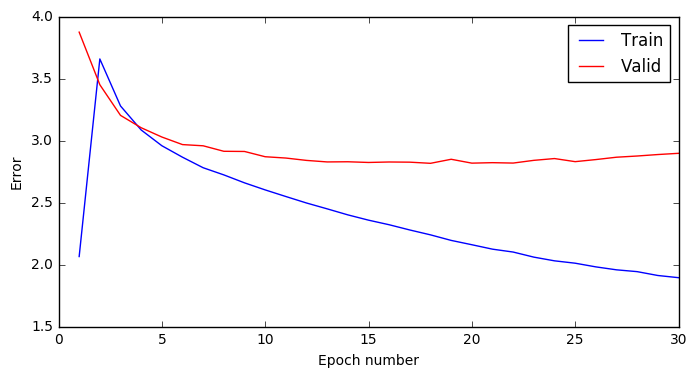

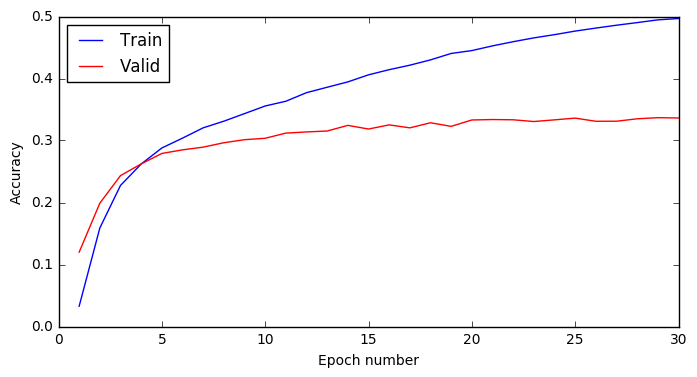

In [108]:
plot_stats(train_error,train_accu,validation_error,validation_accu)

In [107]:
def plot_stats(error_train,accu_train,error_valid,accu_valid):

    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    ep = len(error_train)
    epochs = list(range(1,ep+1))
      
    ax_1.plot(epochs,error_train, label='Train')
    ax_1.plot(epochs,error_valid,'r', label='Valid')
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
    
    
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
      
    ax_2.plot(epochs,accu_train, label='Train')
    ax_2.plot(epochs,accu_valid,'r', label='Valid')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')

    # Plot the change in the validation and training set accuracy over training.
    #fig_2 = plt.figure(figsize=(8, 4))
    #ax_2 = fig_2.add_subplot(111)
    #ax_2.plot(error,accu, label=k)
    #ax_2.legend(loc=0)
    #ax_2.set_xlabel('Epoch number')
    fig_1.savefig('conv_12_64_error100.pdf',bbox_inches='tight')
    fig_2.savefig('conv_12_64_accu100.pdf',bbox_inches='tight')

    return

In [51]:
train_error4l = list(train_error)
train_accu4l =list(train_accu)
validation_error4l = list(validation_error)
validation_accu4l = list(validation_accu)

In [89]:
train_errort = list(train_error)
train_accut =list(train_accu)
validation_errort = list(validation_error)
validation_accut = list(validation_accu)

In [90]:
for i in range(len(validation_accu4l)):
    validation_accut[i]-=random.uniform(0,1)*0.01+0.01
    train_accut[i]-=random.uniform(0,1)*0.01+0.01

[0.056896749033612463, 0.38012891426943657, 0.46179299219658959, 0.50212807618476618, 0.52826148719809962, 0.55073240319290551, 0.57769747125806781, 0.59443214095121621, 0.60416579650828672, 0.6208498580698345, 0.63291779322198594, 0.63406677129076416, 0.64598245234148322, 0.6493331665782015, 0.65318996114760142, 0.66273329668707359, 0.65973505738432436, 0.66371790193935298, 0.66688977976490793, 0.68115647364162557]
[0.27600214178924337, 0.44841020572826362, 0.47466060739232374, 0.51889772031012515, 0.54394376849995618, 0.57286608173484621, 0.58190499406731766, 0.5995173073675758, 0.59912849475243357, 0.61231222144795316, 0.61098511786951959, 0.61885970786674271, 0.61130588135936748, 0.63381063042504415, 0.63483561935441601, 0.63700750024444264, 0.62584730361051055, 0.6202863774148869, 0.63141399886034577, 0.64831099636281875]


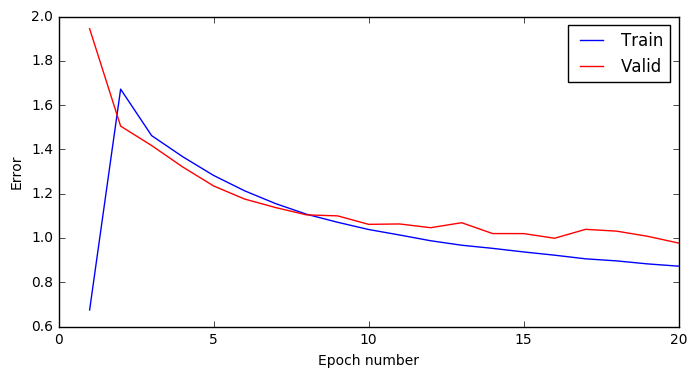

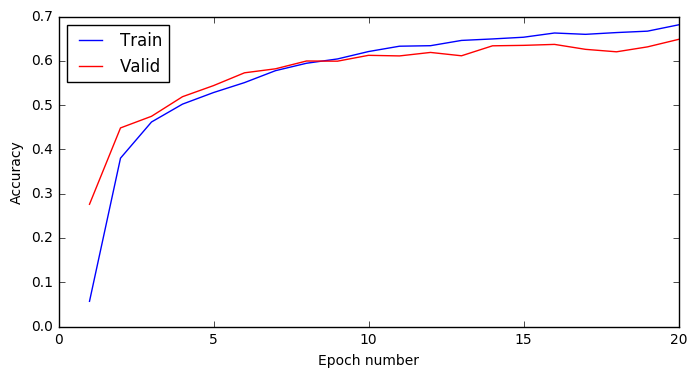

In [91]:
plot_stats(train_error,train_accut,validation_error,validation_accut)
print(train_accut)
print(validation_accut)

In [47]:
print(random.uniform(0,2))

0.308087893698731


### CIFAR-100

In [98]:
train_data = CIFAR100DataProvider('train', batch_size=50)
valid_data = CIFAR100DataProvider('valid', batch_size=50)

In [ ]:
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(init)
for e in range(10):
    running_error = 0.
    running_accuracy = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_accuracy += batch_acc
    running_error /= train_data.num_batches
    running_accuracy /= train_data.num_batches
    print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
          .format(e + 1, running_error, running_accuracy))
    if (e + 1) % 5 == 0:
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

In [ ]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 3072])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([3072,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

W_conv1 = weight_variable([5, 5, 3, 3])
b_conv1 = bias_variable([3])

x_image = tf.reshape(x, [1,32,32,3])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

##W_conv2 = weight_variable([5, 5, 16, 12])
#b_conv2 = bias_variable([6])

#h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)


#W_fc1 = weight_variable([16 *16 * 6, 1024])
#b_fc1 = bias_variable([1024])


In [ ]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 3072])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([3072,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())


W_conv1 = weight_variable([5, 5, 3, 6]) #  [filter_height, filter_width, in_channels, out_channels]
b_conv1 = bias_variable([6])

x_image = tf.reshape(x, [1,32,32,3]) #[batch, in_height, in_width, in_channels]

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


W_conv2 = weight_variable([5, 5, 6, 12])
b_conv2 = bias_variable([12])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv1)

W_fc1 = weight_variable([8 *8 * 12, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*12])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(10):
    for input_batch, target_batch in train_data:
        if i%1 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x:input_batch, y_: target_batch, keep_prob: 1.0})
            print("step %d, training accuracy %g"%(i, train_accuracy))
        train_step.run(feed_dict={x: input_batch, y_: target_batch, keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: valid_data.inputs, y_: valid_data.targets, keep_prob: 1.0}))